In [1]:
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile('Web Network Traffic.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    
# List the extracted files
print("Extracted files:")
print(os.listdir('./'))

Extracted files:
['Web Network Traffic.zip', '.ipynb_checkpoints', 'webtraffic.ipynb', '2bad_reqff.csv', '2good_reqff.csv', 'Testing_data.csv', 'all_datas_f.csv', 'predicted_data2.csv']


In [3]:
import pandas as pd
# Load the Testing_data.csv file
file_path = 'Testing_data.csv'
testing_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
testing_data.head()

,method,path,body,single_q,double_q,dashes,braces,spaces,percentages,semicolons,angle_brackets,special_chars,path_length,body_length,badwords_count
0,POST,/doLogin,uid=ZAP&passw=ZAP&btnSubmit=Login,0,0,0,0,0,0,0,0,0,8,33,1
1,POST,/sendFeedback,cfile=comments.txt&name=ZAP&email_addr=ZAP&sub...,0,0,0,0,7,0,0,0,0,13,124,0
2,GET,/admin/clients.xls,NaN,0,0,0,0,0,0,0,0,0,18,0,1
3,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,57,0,0
4,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,82,0,0


In [4]:
# Display summary statistics of the dataset
testing_data.describe()

,single_q,double_q,dashes,braces,spaces,percentages,semicolons,angle_brackets,special_chars,path_length,body_length,badwords_count
count,116.0,116.0,116.0,116.0,116.000000,116.0,116.0,116.0,116.0,116.000000,116.000000,116.000000
mean,0.0,0.0,0.0,0.0,0.939655,0.0,0.0,0.0,0.0,42.456897,10.103448,0.206897
std,0.0,0.0,0.0,0.0,1.770722,0.0,0.0,0.0,0.0,22.956061,33.855545,0.466574
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,27.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,39.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,0.0,47.250000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,105.000000,178.000000,2.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn')

# 1. Basic Information
print("Dataset Shape:", testing_data.shape)
print("\
Missing Values:")
print(testing_data.isnull().sum())
print("\
Data Types:")
print(testing_data.dtypes)

# 2. HTTP Methods Distribution
plt.figure(figsize=(10, 6))
testing_data['method'].value_counts().plot(kind='bar')
plt.title('Distribution of HTTP Methods')
plt.xlabel('HTTP Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Path Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=testing_data, x='path_length', bins=30)
plt.title('Distribution of Path Lengths')
plt.xlabel('Path Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Body Length Distribution (excluding zeros)
plt.figure(figsize=(10, 6))
sns.histplot(data=testing_data[testing_data['body_length'] > 0], x='body_length', bins=30)
plt.title('Distribution of Body Lengths (excluding zeros)')
plt.xlabel('Body Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Correlation Matrix for Numeric Columns
numeric_cols = testing_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(testing_data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# 6. Bad Words Count Distribution
plt.figure(figsize=(10, 6))
testing_data['badwords_count'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Bad Words Count')
plt.xlabel('Number of Bad Words')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 7. Spaces Distribution
plt.figure(figsize=(10, 6))
testing_data['spaces'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Spaces')
plt.xlabel('Number of Spaces')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 8. Summary Statistics for Key Metrics
print("\
Summary Statistics for Key Metrics:")
print(testing_data[['path_length', 'body_length', 'badwords_count', 'spaces']].describe())

In [6]:
print(os.listdir())

['Web Network Traffic.zip', '.ipynb_checkpoints', 'webtraffic.ipynb', '2bad_reqff.csv', '2good_reqff.csv', 'Testing_data.csv', 'all_datas_f.csv', 'predicted_data2.csv']


Dataset Shape: (116, 15)
Missing Values:
method              0
path                0
body              104
single_q            0
double_q            0
dashes              0
braces              0
spaces              0
percentages         0
semicolons          0
angle_brackets      0
special_chars       0
path_length         0
body_length         0
badwords_count      0
dtype: int64
Data Types:
method            object
path              object
body              object
single_q           int64
double_q           int64
dashes             int64
braces             int64
spaces             int64
percentages        int64
semicolons         int64
angle_brackets     int64
special_chars      int64
path_length        int64
body_length        int64
badwords_count     int64
dtype: object


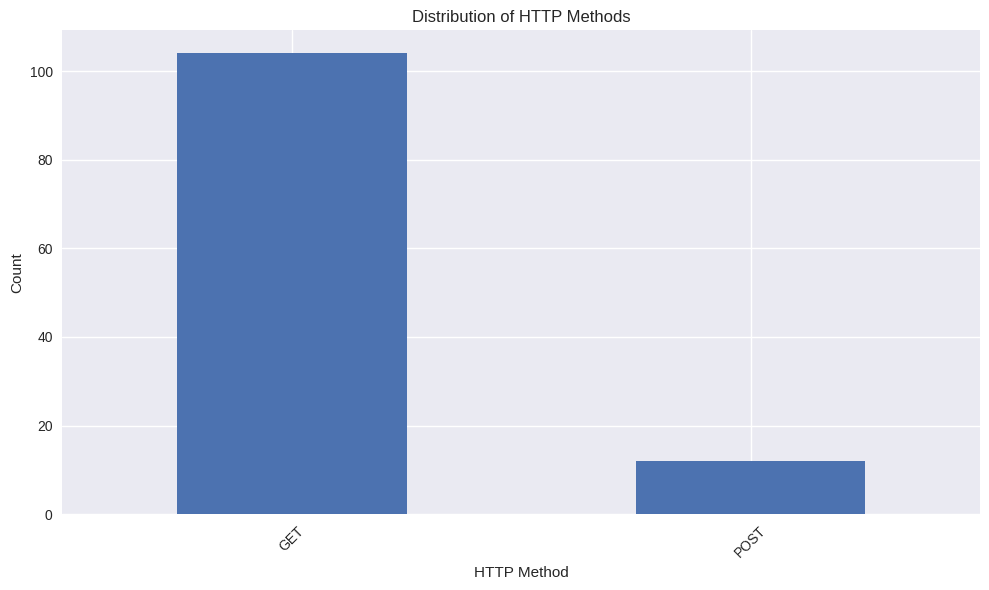

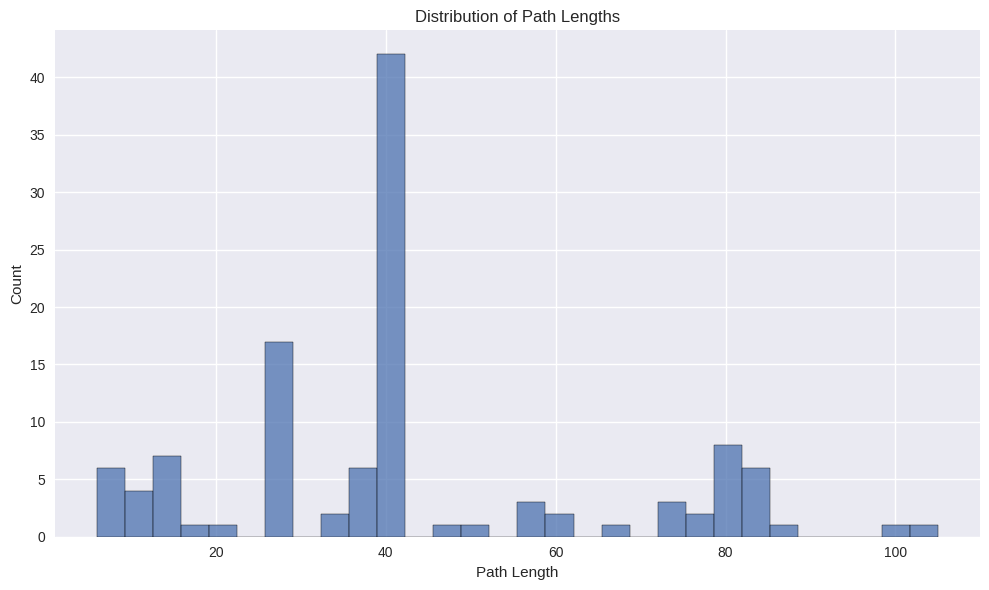

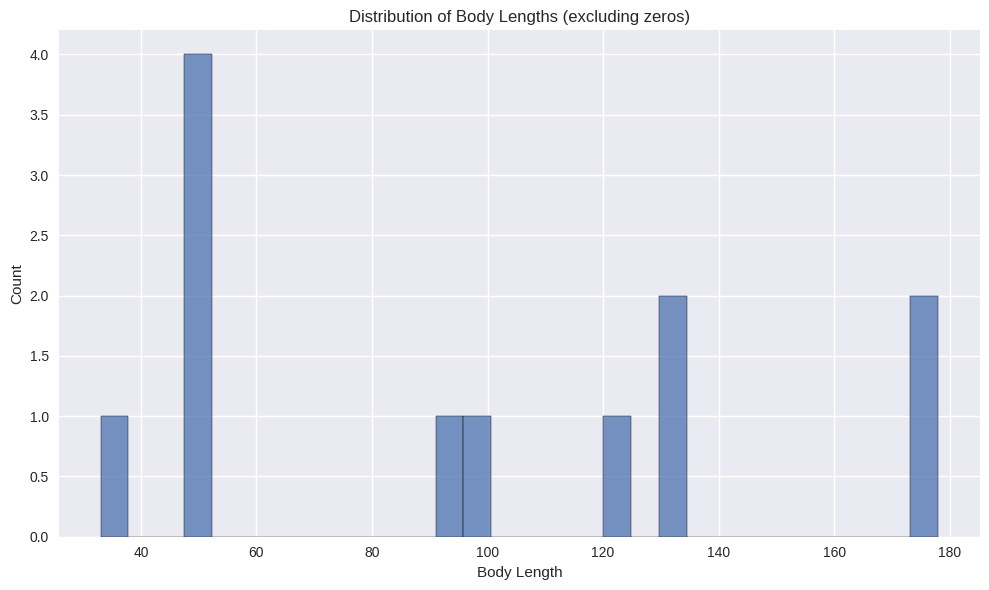

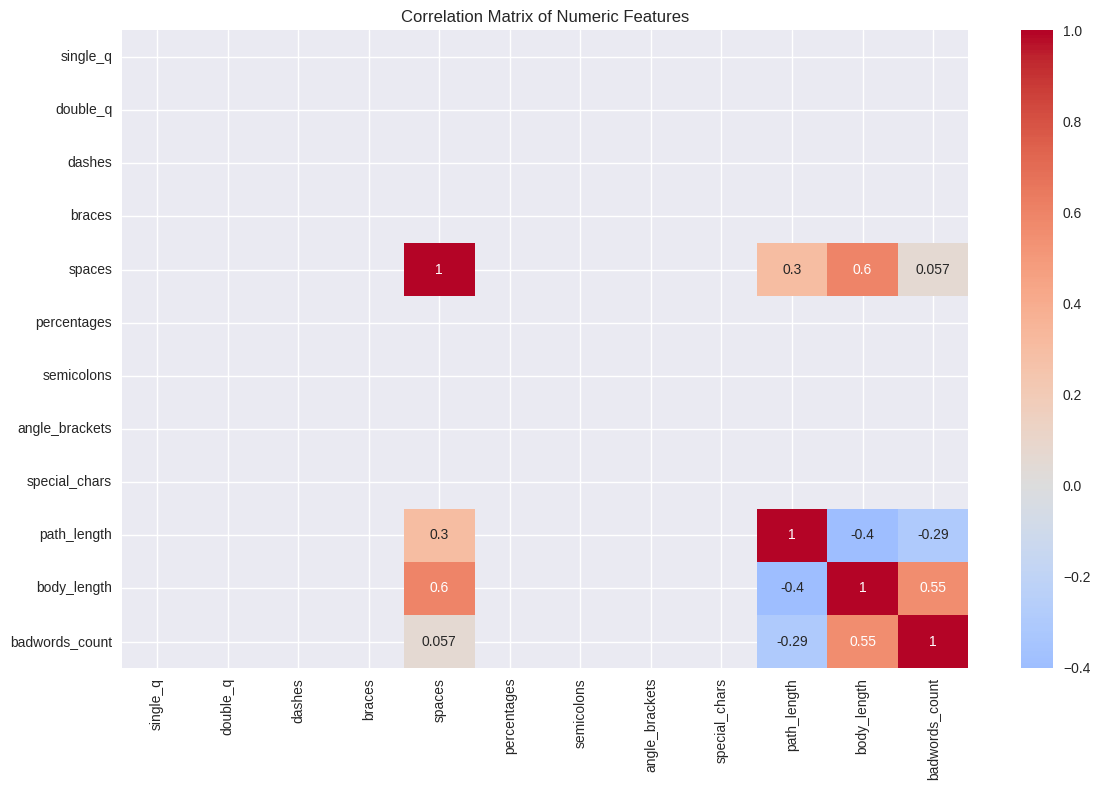

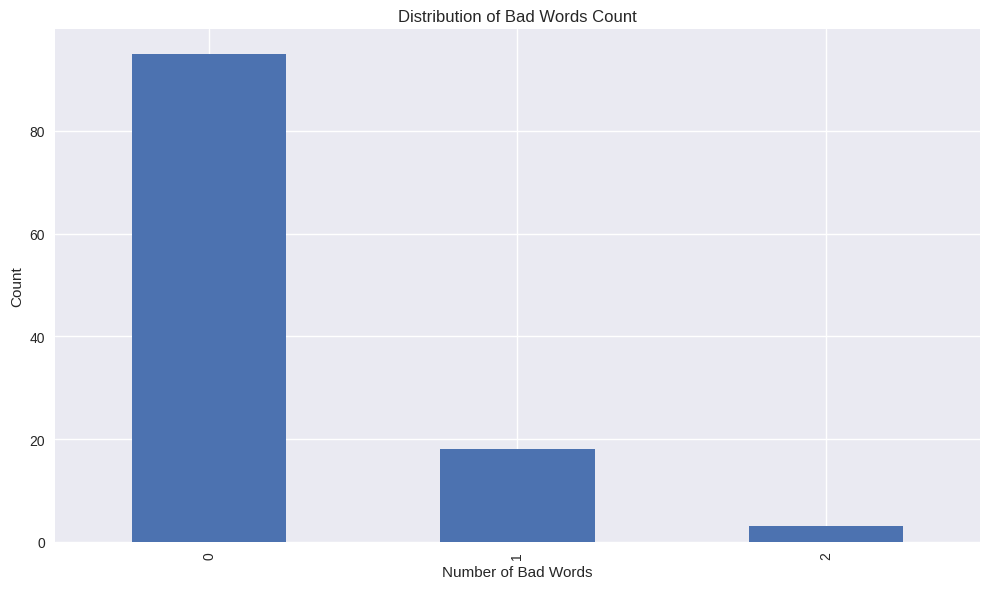

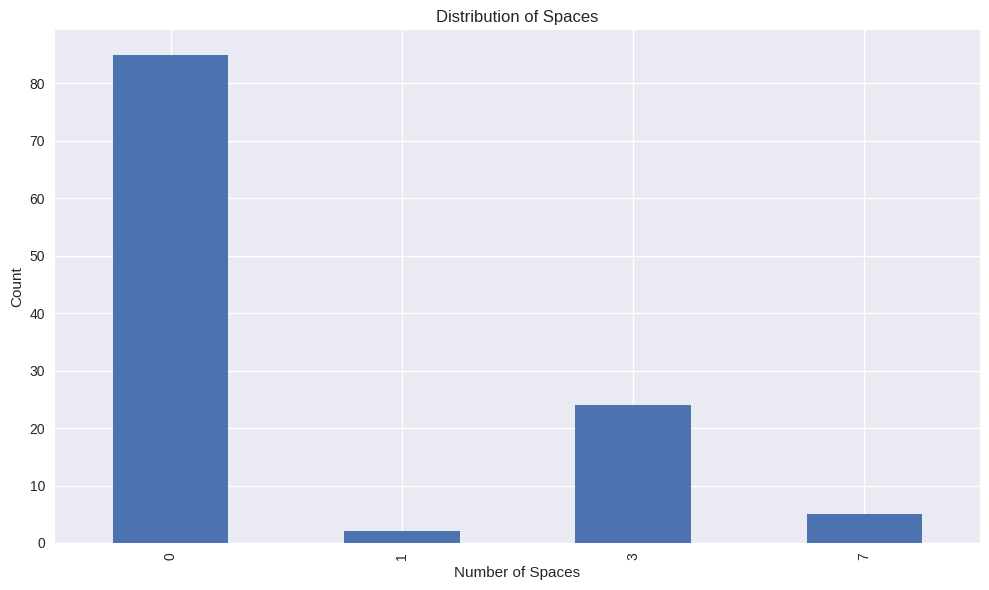

Summary Statistics for Key Metrics:
       path_length  body_length  badwords_count      spaces
count   116.000000   116.000000      116.000000  116.000000
mean     42.456897    10.103448        0.206897    0.939655
std      22.956061    33.855545        0.466574    1.770722
min       6.000000     0.000000        0.000000    0.000000
25%      27.000000     0.000000        0.000000    0.000000
50%      39.000000     0.000000        0.000000    0.000000
75%      47.250000     0.000000        0.000000    1.500000
max     105.000000   178.000000        2.000000    7.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')

# 1. Basic Information
print("Dataset Shape:", testing_data.shape)
print("\
Missing Values:")
print(testing_data.isnull().sum())
print("\
Data Types:")
print(testing_data.dtypes)

# 2. HTTP Methods Distribution
plt.figure(figsize=(10, 6))
testing_data['method'].value_counts().plot(kind='bar')
plt.title('Distribution of HTTP Methods')
plt.xlabel('HTTP Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Path Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=testing_data, x='path_length', bins=30)
plt.title('Distribution of Path Lengths')
plt.xlabel('Path Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Body Length Distribution (excluding zeros)
plt.figure(figsize=(10, 6))
sns.histplot(data=testing_data[testing_data['body_length'] > 0], x='body_length', bins=30)
plt.title('Distribution of Body Lengths (excluding zeros)')
plt.xlabel('Body Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Correlation Matrix for Numeric Columns
numeric_cols = testing_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(testing_data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# 6. Bad Words Count Distribution
plt.figure(figsize=(10, 6))
testing_data['badwords_count'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Bad Words Count')
plt.xlabel('Number of Bad Words')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 7. Spaces Distribution
plt.figure(figsize=(10, 6))
testing_data['spaces'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Spaces')
plt.xlabel('Number of Spaces')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 8. Summary Statistics for Key Metrics
print("\
Summary Statistics for Key Metrics:")
print(testing_data[['path_length', 'body_length', 'badwords_count', 'spaces']].describe())